## Titanic Dataset ##

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA ###

In [3]:
gender_submission=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Titanic dataset- Day 1/titanic/gender_submission.csv")

In [4]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
test_data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Titanic dataset- Day 1/titanic/test.csv")
train_data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Titanic dataset- Day 1/titanic/train.csv")

In [6]:
gender_submission.shape

(418, 2)

In [7]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [10]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

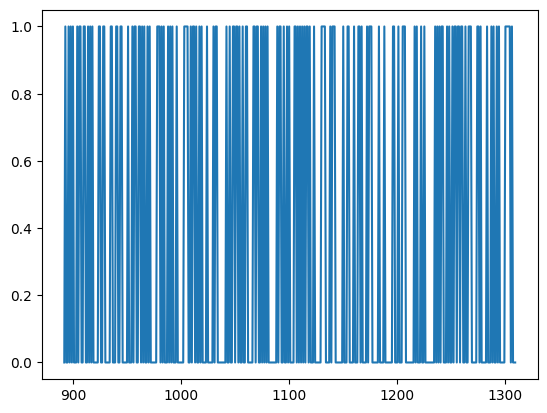

In [11]:
plt.plot(gender_submission["PassengerId"],gender_submission["Survived"])

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

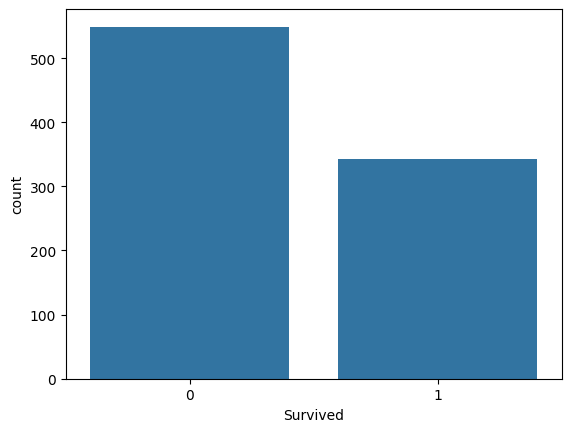

In [15]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Sex', ylabel='count'>

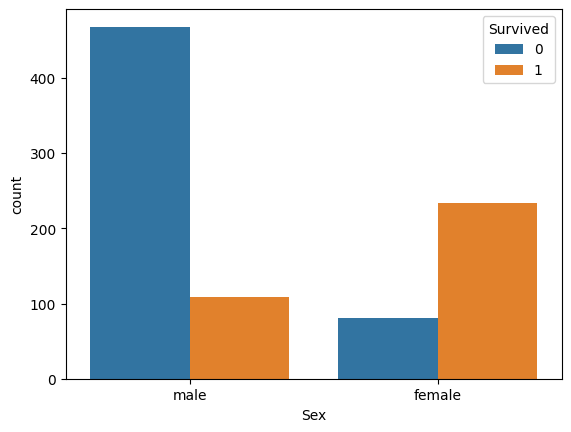

In [16]:
sns.countplot(x='Sex',hue='Survived',data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

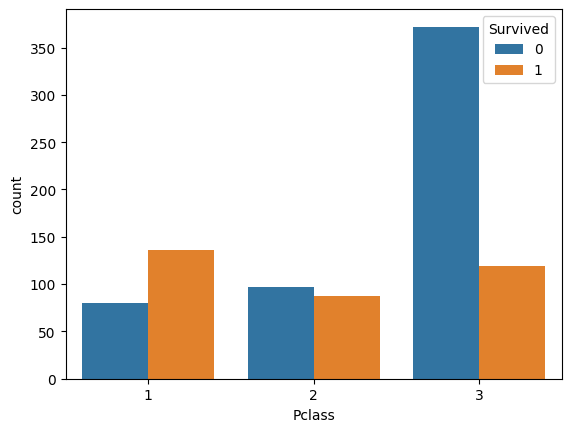

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

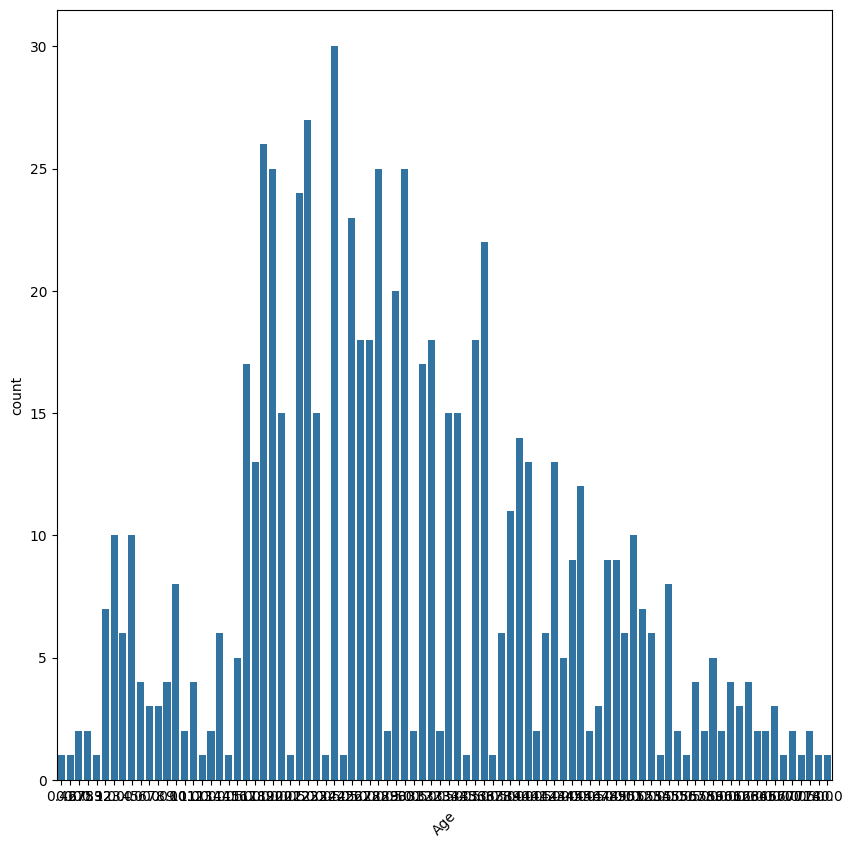

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age', data=train_data)
plt.xlabel('Age', rotation=45)
plt.show()

## Data Transformation ##

In [19]:
train_data['Sex']=train_data['Sex'].map({'male':0,'female':1})

In [20]:
numeric_features=train_data.select_dtypes(include=['int64','float64'])

In [21]:
corr_matrix=numeric_features.corr()

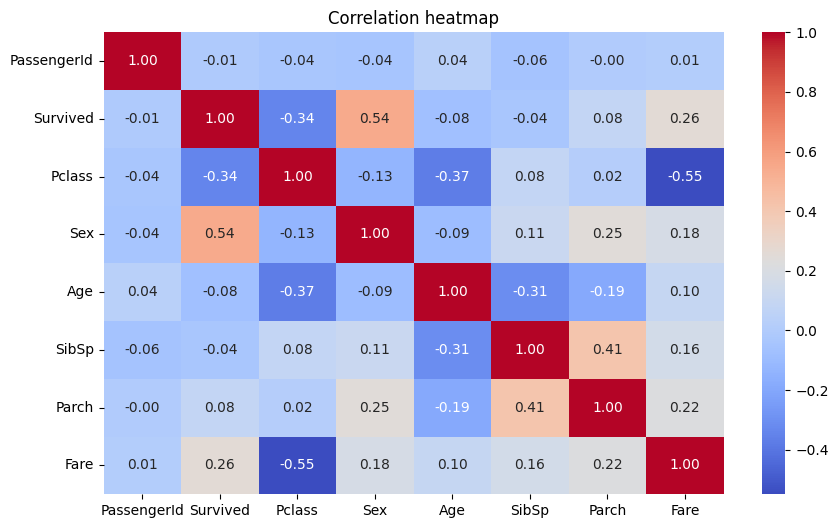

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,  annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [23]:
# filling missing values in age with median values

median_age=train_data['Age'].median()
train_data['Age']=train_data['Age'].fillna(median_age)

In [24]:
train_data['Age'].isnull().sum()

0

In [25]:
# filling embarked using mode

Embarked_mode=train_data['Embarked'].mode()
train_data['Embarked']=train_data['Embarked'].fillna(Embarked_mode)

In [26]:
#Dropping irrelevant columns

train_data.drop(['PassengerId', 'Ticket','Cabin'],axis=1,inplace=True)

In [27]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C


In [28]:
# creating a new column named Family_size

train_data['Family_size']=train_data['SibSp']+train_data['Parch']+1

In [29]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1


In [30]:
#creating a new column to check if a passenger is alone or with family

train_data['IsAlone']=np.where(train_data['Family_size']==1,1,0)

In [31]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,1,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S,4,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1,1


In [32]:
#Extracting the title from the name

train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/37/2w0rf75s0kg0v252612pvgw40000gn/T/ipykernel_34863/3747419501.py:3: SyntaxWarning: invalid escape sequence '\.'
  train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [33]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,1,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,1,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S,4,0,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1,1,Mr


In [34]:
#dropping the name column

train_data.drop('Name', axis=1,inplace=True)

In [35]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,1,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,1,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,1,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,0,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,1,1,Rev
887,1,1,1,19.0,0,0,30.0000,S,1,1,Miss
888,0,3,1,28.0,1,2,23.4500,S,4,0,Miss
889,1,1,0,26.0,0,0,30.0000,C,1,1,Mr


In [36]:
#replacing rare titles

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Jonkheer', 'Don', 'Dona']
train_data['Title']=train_data['Title'].replace(rare_titles, 'Rare')

train_data['Title']=train_data['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

In [37]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,1,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,1,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,1,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,0,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,1,1,Rare
887,1,1,1,19.0,0,0,30.0000,S,1,1,Miss
888,0,3,1,28.0,1,2,23.4500,S,4,0,Miss
889,1,1,0,26.0,0,0,30.0000,C,1,1,Mr


In [38]:
train_data['Title'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object>

In [39]:
# one hot encoding of Emarked column and Title column

train_data=pd.get_dummies(train_data, columns=['Embarked', 'Title'], drop_first=True)

In [40]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,IsAlone,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,2,0,False,True,False,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,True,False,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,False,True,False,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,1,1,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,1,False,True,False,False,False,False,True
887,1,1,1,19.0,0,0,30.0000,1,1,False,True,False,True,False,False,False
888,0,3,1,28.0,1,2,23.4500,4,0,False,True,False,True,False,False,False
889,1,1,0,26.0,0,0,30.0000,1,1,False,False,False,False,True,False,False


In [82]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_size', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

## Modelling ##

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [90]:
y=train_data['Survived']

X=train_data.drop('Survived', axis=1)

In [92]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [100]:
#Logistic Regression

log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log=log_model.predict(X_test)

print("Logistic Regression accuracy: ",accuracy_score(y_test, y_pred_log))
print("Logistic Regression precision: ", precision_score(y_test, y_pred_log))
print("Logistic Regression recall: ",recall_score(y_test, y_pred_log))
print("Logistic Regression confusion matrix: ", confusion_matrix(y_test, y_pred_log))
print("Logistic Regression f1_score: ", f1_score(y_test, y_pred_log))


Logistic Regression accuracy:  0.8156424581005587
Logistic Regression precision:  0.7808219178082192
Logistic Regression recall:  0.7702702702702703
Logistic Regression confusion matric:  [[89 16]
 [17 57]]
Logistic Regression f1_score:  0.7755102040816326


In [104]:
#Random Forest

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

print("Random forest accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random forest Precision: ", precision_score(y_test,y_pred_rf))
print("Random forest recall: ", recall_score(y_test, y_pred_rf))
print("Random forest confusion matrix: ",confusion_matrix(y_test, y_pred_rf))
print("Random forest f1_score: ",f1_score(y_test, y_pred_log))

Random forest accuracy:  0.8324022346368715
Random forest Precision:  0.7972972972972973
Random forest recall:  0.7972972972972973
Random forest confusion matrix:  [[90 15]
 [15 59]]
Random forest f1_score:  0.7755102040816326
